# Clustering Crypto

In [194]:
# Initial imports
import matplotlib.pyplot as plt
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Pre-processing the Data for PCA

In [195]:
# Load the crypto_data.csv dataset.
crypto_df = pd.read_csv('crypto_data.csv', index_col=0)
crypto_df.dtypes

CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [196]:
# Keep all the cryptocurrencies that are being traded.
crypto_df = crypto_df[crypto_df['IsTrading'] == True]
crypto_df["IsTrading"].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [197]:
# Remove the "IsTrading" column. 
crypto_df.drop('IsTrading', axis=1, inplace=True)
crypto_df.shape

(1144, 5)

In [198]:
# Remove rows that have at least 1 null value.
crypto_df.dropna().shape

(685, 5)

In [199]:
# Keep the rows where coins are mined.
crypto_df = crypto_df[crypto_df['TotalCoinsMined'] > 0]
crypto_df.shape

(532, 5)

In [200]:
crypto_name_df = crypto_df['CoinName']
crypto_name_df.head()

42        42 Coin
404       404Coin
1337    EliteCoin
BTC       Bitcoin
ETH      Ethereum
Name: CoinName, dtype: object

In [201]:
crypto_df.drop('CoinName', axis=1, inplace=True)
crypto_df.shape

(532, 4)

In [202]:
X = pd.get_dummies(crypto_df,columns=['Algorithm','ProofType'])
X.head(2)

TotalCoinsMined TotalCoinSupply  Algorithm_1GB AES Pattern Search  \
42      4.199995e+01              42                                 0   
404     1.055185e+09       532000000                                 0   

     Algorithm_536  Algorithm_Argon2d  Algorithm_BLAKE256  Algorithm_Blake  \
42               0                  0                   0                0   
404              0                  0                   0                0   

     Algorithm_Blake2S  Algorithm_Blake2b  Algorithm_C11  ...  \
42                   0                  0              0  ...   
404                  0                  0              0  ...   

     ProofType_PoW/PoS  ProofType_PoW/PoS   ProofType_PoW/PoW  \
42                   1                   0                  0   
404                  1                   0                  0   

     ProofType_PoW/nPoS  ProofType_Pos  ProofType_Proof of Authority  \
42                    0              0                             0   
404                   0              0                             0   

     ProofType_Proof of Trust  ProofType_TPoS  ProofType_Zero-Knowledge Proof  \
42                          0               0                               0   
404                         0               0                               0   

     ProofType_dPoW/PoW  
42                    0  
404                   0  

[2 rows x 98 columns]

In [203]:
# Standardize the data with StandardScaler().
scaler = StandardScaler()
model = scaler.fit(X)
scaled_data = model.transform(X)
scaled_data

array([[-0.11710444, -0.1528531 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.0939656 , -0.14499112, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.5249554 ,  4.48749054, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09560943, -0.13216038, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694444, -0.15254276, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710163, -0.15283832, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

## Deliverable 2: Reducing Data Dimensions Using PCA

In [204]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=3).fit_transform(scaled_data)

In [205]:
# Create a DataFrame with the three principal components.
pcs_df = pd.DataFrame(data = pca, columns = ['pc1', 'pc2', 'pc3'], index=crypto_df.index)
pcs_df.head(2)

pc1       pc2       pc3
42  -0.315620  0.964090 -0.541708
404 -0.299008  0.964338 -0.542077

## Deliverable 3: Clustering Crytocurrencies Using K-Means
### Finding the Best Value for k Using the Elbow Curve

In [206]:
# Create an elbow curve to find the best value for K.inertia = []
inertia = []
k = list(range(1,11))

# Calculate the inertia for the range of K values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pcs_df)
    inertia.append(km.inertia_)

C:\Users\ryanj\anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


In [207]:
#Create the elbow curve
elbow_data = {'k':k, 'inertia': inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df.hvplot.line(x="k",y="inertia",xticks=k,title='Crypto Elbow Curve')

:Curve   [k]   (inertia)

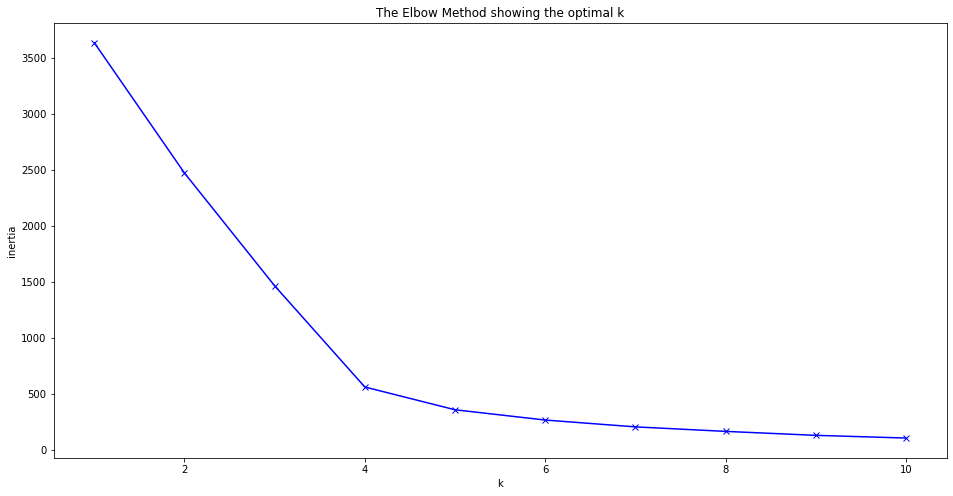

In [208]:
plt.figure(figsize=(16,8))
plt.plot(elbow_data['k'], elbow_data['inertia'], 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [221]:
# Initialize the K-Means model.
model = KMeans(n_clusters=5, random_state=21).fit(pcs_df)

# Fit the model
y_pred = model.fit_predict(pcs_df)

In [223]:
pcs_df['class'] = model.labels_
pcs_df.head(2)

pc1       pc2       pc3  class
42  -0.315620  0.964090 -0.541708      0
404 -0.299008  0.964338 -0.542077      0

In [224]:
clustered_df = pd.concat([crypto_df,pcs_df,crypto_name_df], axis=1)
clustered_df.head(2)

Algorithm ProofType  TotalCoinsMined TotalCoinSupply       pc1       pc2  \
42     Scrypt   PoW/PoS     4.199995e+01              42 -0.315620  0.964090   
404    Scrypt   PoW/PoS     1.055185e+09       532000000 -0.299008  0.964338   

          pc3  class CoinName  
42  -0.541708      0  42 Coin  
404 -0.542077      0  404Coin